In [1]:
import sklearn as sk
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np

In [2]:
ori_data, target = load_breast_cancer(return_X_y=True)

In [3]:
# Prepare datasets
n_training = 300
n_test = np.shape(target)[0] - n_training

b_train = ori_data[:n_training]
b_test = ori_data[n_training:]

t_train = target[:n_training]
t_test = target[n_training:]

In [5]:
# Processing
import pandas as pd
columns = ['feature ' + str(i) for i in range(np.shape(b_train)[1]) ]
df = pd.DataFrame(b_train, columns=columns)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[columns].values)

# Factor Analysis
factor = FactorAnalysis(n_components=2)
factor_result = pca.fit_transform(df[columns].values)

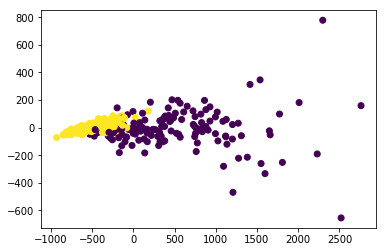

In [5]:
# Visualisation
import matplotlib.pyplot as plt
plt.scatter(pca_result[:,0], pca_result[:,1], c=t_train)
plt.show()

# GP Classifier

In [6]:
from sklearn.gaussian_process import GaussianProcessClassifier as gpc
from sklearn.gaussian_process.kernels import RBF

In [7]:
kernel = 1.0 * RBF([1.0 ,1.0])
classifier = gpc(kernel=kernel)

In [8]:
pca_res = (np.vstack((pca_result[:,0], pca_result[:,1]))).T
classifier.fit(pca_res, t_train)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=[1, 1]), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=None,
             warm_start=False)

In [9]:
# Test Time
t_pca = pca.transform(b_test)
print(1 - np.sum(np.abs(t_test - classifier.predict(t_pca))) / np.shape(t_test)[0])

0.9330855018587361


# Visualisation

In [28]:
# Create Meshgrid
pca_data = pca.transform(ori_data)
x_min, x_max = pca_data[:,0].min(), pca_data[:,0].max()
y_min, y_max = pca_data[:,1].min(), pca_data[:,1].max()

# Heat Map
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                     np.linspace(y_min, y_max, 10))

z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
z = z.reshape((np.shape(xx)[0],np.shape(xx)[1]))

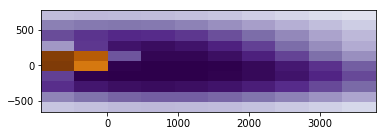

In [30]:
plt.imshow(z, interpolation='nearest',
           extent=(x_min, x_max, y_min, y_max),
           origin='lower',
           cmap=plt.cm.PuOr_r)
plt.show()